<a href="https://colab.research.google.com/github/Pushpit07/K-Means-Clustering-and-Recommendations-System/blob/main/Custom_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import make_blobs

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
X, y = make_blobs(centers=3, random_state=42)

In [17]:
import random

In [26]:
class Cluster:
  def __init__(self, center):
    self.center = center
    self.points = []
    
  def distance(self, point):
    return np.sqrt(np.sum((point - self.center) ** 2))

class CustomKMeans:
  def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
  
  def fit(self, X):
    clusters = []
    for i in range(self.n_clusters):
        cluster = Cluster(center=random.choice(X))
        clusters.append(cluster)

    for i in range(self.max_iters):
            labels = []
            # going for each point
            for point in X:

                # collecting disctances form every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
    self.labels_ = labels
    self.cluster_centers_ = [cluster.center for cluster in clusters]

In [27]:
model = CustomKMeans(n_clusters=4)

model.fit(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


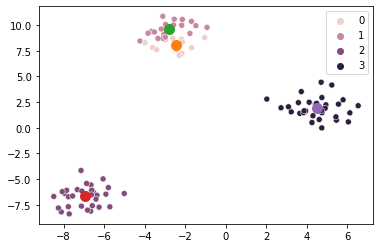

In [28]:
sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)

for center in model.cluster_centers_:
  plt.scatter(center[0], center[1], s=100)